# Train Test Split

In [2]:
from music_preprocessing import create_mfcc, split_data

In [3]:
# data = create_mfcc()
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data('music_data.json')
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((6934, 130, 13, 1),
 (1486, 130, 13, 1),
 (1486, 130, 13, 1),
 (6934, 10),
 (1486, 10),
 (1486, 10))

In [56]:
import json

with open('music_data.json') as f:
    data = json.load(f)

In [57]:
genre_labels = data['mapping']
genre_labels

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [61]:
genre_mapping = {}
for idx, labels in enumerate(genre_labels):
    genre_mapping[idx] = labels
genre_mapping

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

# Convolutional Neural Network

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(28, activation='relu', kernel_regularizer=l2()))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 5, 32)         0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 64, 5, 32)         128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 62, 3, 64)         18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 31, 1, 64)         0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 31, 1, 64)         256       
_________________________________________________________________
flatten_13 (Flatten)         (None, 1984)            

In [36]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/500
55/55 [==============================] - 0s 7ms/step - loss: 2.3848 - acc: 0.3903 - val_loss: 5.0791 - val_acc: 0.2227
Epoch 2/500
55/55 [==============================] - 0s 4ms/step - loss: 1.8031 - acc: 0.5221 - val_loss: 2.3564 - val_acc: 0.3553
Epoch 3/500
55/55 [==============================] - 0s 4ms/step - loss: 1.5495 - acc: 0.5904 - val_loss: 1.7891 - val_acc: 0.4953
Epoch 4/500
55/55 [==============================] - 0s 4ms/step - loss: 1.3855 - acc: 0.6351 - val_loss: 1.4346 - val_acc: 0.6030
Epoch 5/500
55/55 [==============================] - 0s 4ms/step - loss: 1.2192 - acc: 0.6829 - val_loss: 1.3158 - val_acc: 0.6427
Epoch 6/500
55/55 [==============================] - 0s 4ms/step - loss: 1.1214 - acc: 0.7068 - val_loss: 1.2371 - val_acc: 0.6602
Epoch 7/500
55/55 [==============================] - 0s 4ms/step - loss: 1.0348 - acc: 0.7293 - val_loss: 1.2703 - val_acc: 0.6433
Epoch 8/500
55/55 [==============================] - 0s 4ms/step - loss: 0.9951 - a

Epoch 125/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3658 - acc: 0.9442 - val_loss: 0.9925 - val_acc: 0.7820
Epoch 126/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3617 - acc: 0.9433 - val_loss: 0.9384 - val_acc: 0.7995
Epoch 127/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3767 - acc: 0.9354 - val_loss: 1.0392 - val_acc: 0.7658
Epoch 128/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3743 - acc: 0.9396 - val_loss: 0.9552 - val_acc: 0.7880
Epoch 129/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3993 - acc: 0.9295 - val_loss: 1.0466 - val_acc: 0.7550
Epoch 130/500
55/55 [==============================] - 0s 4ms/step - loss: 0.4509 - acc: 0.9184 - val_loss: 0.9674 - val_acc: 0.7752
Epoch 131/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3913 - acc: 0.9389 - val_loss: 0.9606 - val_acc: 0.7786
Epoch 132/500
55/55 [==============================] - 0s 4ms/step - 

Epoch 248/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3354 - acc: 0.9489 - val_loss: 0.9798 - val_acc: 0.8048
Epoch 249/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3387 - acc: 0.9510 - val_loss: 1.0061 - val_acc: 0.7968
Epoch 250/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3256 - acc: 0.9563 - val_loss: 1.0035 - val_acc: 0.7921
Epoch 251/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3458 - acc: 0.9510 - val_loss: 0.9861 - val_acc: 0.7988
Epoch 252/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3422 - acc: 0.9500 - val_loss: 0.9674 - val_acc: 0.8022
Epoch 253/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3412 - acc: 0.9492 - val_loss: 0.9969 - val_acc: 0.7941
Epoch 254/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3283 - acc: 0.9544 - val_loss: 0.8820 - val_acc: 0.8116
Epoch 255/500
55/55 [==============================] - 0s 4ms/step - 

Epoch 371/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3170 - acc: 0.9590 - val_loss: 0.8645 - val_acc: 0.8156
Epoch 372/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3381 - acc: 0.9476 - val_loss: 0.9038 - val_acc: 0.8217
Epoch 373/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3165 - acc: 0.9585 - val_loss: 0.9140 - val_acc: 0.8176
Epoch 374/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3089 - acc: 0.9596 - val_loss: 0.9101 - val_acc: 0.8096
Epoch 375/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3204 - acc: 0.9551 - val_loss: 0.9338 - val_acc: 0.8156
Epoch 376/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3100 - acc: 0.9592 - val_loss: 0.9496 - val_acc: 0.8082
Epoch 377/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3059 - acc: 0.9613 - val_loss: 0.8899 - val_acc: 0.8109
Epoch 378/500
55/55 [==============================] - 0s 4ms/step - 

Epoch 494/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3177 - acc: 0.9570 - val_loss: 0.9484 - val_acc: 0.8143
Epoch 495/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3437 - acc: 0.9523 - val_loss: 0.9844 - val_acc: 0.8116
Epoch 496/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3389 - acc: 0.9569 - val_loss: 0.9773 - val_acc: 0.8116
Epoch 497/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3216 - acc: 0.9616 - val_loss: 0.9665 - val_acc: 0.8102
Epoch 498/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3276 - acc: 0.9588 - val_loss: 1.0087 - val_acc: 0.8069
Epoch 499/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3328 - acc: 0.9573 - val_loss: 0.9703 - val_acc: 0.8129
Epoch 500/500
55/55 [==============================] - 0s 4ms/step - loss: 0.3308 - acc: 0.9575 - val_loss: 1.0303 - val_acc: 0.7988


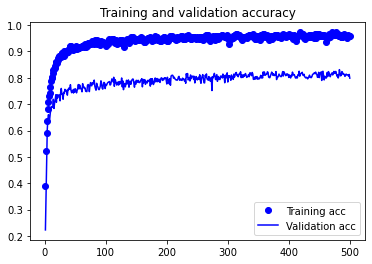

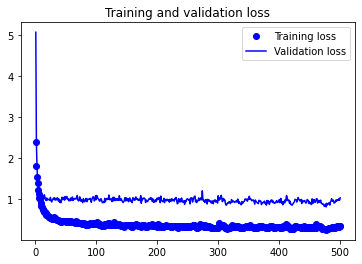

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Showing bias

# Evaluate on Test Data

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.8443 - acc: 0.8291


[0.8442695140838623, 0.8290713429450989]

In [75]:
y_predictions = model.predict(X_test)
y_pred_labels = [genre_mapping[i] for i in y_predictions.argmax(axis=1)]
y_test_labels = [genre_mapping[i] for i in y_test.argmax(axis=1)]

In [76]:
print(classification_report(y_pred_labels, y_test_labels))

              precision    recall  f1-score   support

       blues       0.81      0.91      0.86       123
   classical       0.97      0.92      0.95       158
     country       0.82      0.69      0.75       178
       disco       0.74      0.80      0.77       138
      hiphop       0.70      0.83      0.76       127
        jazz       0.89      0.91      0.90       144
       metal       0.89      0.88      0.89       152
         pop       0.91      0.80      0.85       169
      reggae       0.84      0.77      0.80       164
        rock       0.72      0.81      0.76       133

    accuracy                           0.83      1486
   macro avg       0.83      0.83      0.83      1486
weighted avg       0.83      0.83      0.83      1486



<AxesSubplot:>

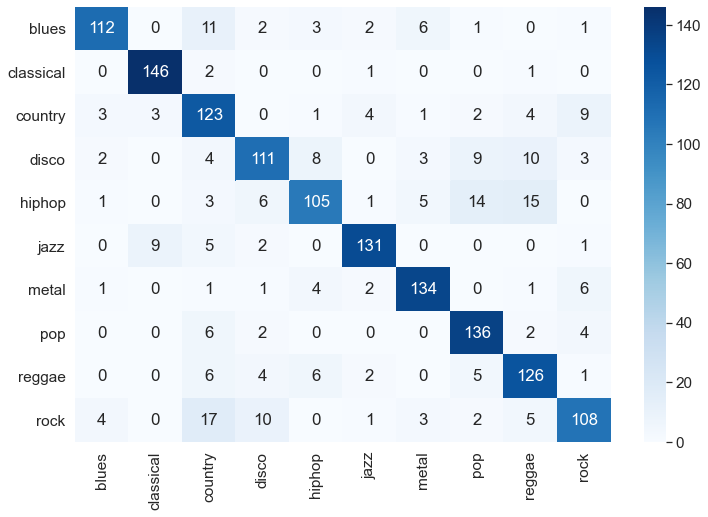

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = pd.DataFrame(confusion_matrix(y_test_labels, y_pred_labels, labels=genre_labels))
cm.columns = genre_labels
cm.index = genre_labels
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d')

The model seems to have a slightly harder time with country, disco, hiphop and rock. Highest performance was achieved with Classical music, which had an F1-score of 0.95.